# Aggregate extraced time across multiple traces

1. Input parameters: directory with JSON traces, trace name pattern, (multiple) event patterns.  
   a. In trace name pattern include the varying parameter value (MBS).
2. For each event pattern, extract event time from all traces one by one using parseOneTrace script.
3. Aggregate values into one DF along with the varying parameter value extracted from the trace filename.


In [2]:
import os
import pandas as pd
import subprocess
import re
import matplotlib
from matplotlib import pyplot as plt

## Set input parameters

In [3]:
logdir = 'logs/DL.cont/traces/20200803'
trace_name_pattern = 'nsys_trace_([0-9]+).json'
event_patterns = ['.*prediction.*','.*WD pass.*', '.*optimizer update.*', '.*iteration.*']

## Read trace files

In [4]:
list_command = "ls -1 " + logdir
files = []
param_values = []
proc = subprocess.Popen(list_command.split(" "),
                        stdout=subprocess.PIPE,
                        stderr=subprocess.STDOUT,
                        encoding='utf8')
for line in iter(proc.stdout.readline, ''):
    line = line.strip(" \n")
    m = re.match(trace_name_pattern, line)
    if m:
        files.append(os.path.abspath(os.path.join(logdir, line)))
        param_values.append(m.group(1))

print('{} files in {}'.format(len(files), logdir))
print(tuple(zip(files,param_values)))

20 files in logs/DL.cont/traces/20200803
(('/Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_10.json', '10'), ('/Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_11.json', '11'), ('/Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_12.json', '12'), ('/Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_13.json', '13'), ('/Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_14.json', '14'), ('/Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_15.json', '15'), ('/Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_16.json', '16'), ('/Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_17.json', '17'), ('/Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_18.json', '18'), ('/Users/pete

In [8]:
results = None
# Set to True to parse JSON traces saving results in a CSV
parse_json_traces=True
for param, tracefile in zip(param_values, files):
    events = ' '.join(event_patterns)
    if parse_json_traces:
        # Run
        # python3 parseOneTrace.py -f $tracefile --events $events
        command = 'python3 parseOneTrace.py -f {} --events {}'.format(tracefile, events)
        print(command)
        p = subprocess.run(command.split(' '), stdout=subprocess.PIPE, stderr=subprocess.PIPE,
                           bufsize=0, shell=False)
        if p.returncode == 0:
            if p.stdout:
                print(p.stdout.decode('utf-8'))
            print('Finished OK')
        else:        
            print(p.stdout.decode('utf-8'))
            print('ERROR')
            print(p.stderr.decode('utf-8'))
    # Read data from CSV file
    directory = os.path.dirname(tracefile)
    csvfile = ('').join(os.path.basename(
        tracefile).split('.')[:-1])  # Filename without extension
    csvfile = csvfile + '.csv'
    csvfile = os.path.join(directory, csvfile)
    print('Reading {}'.format(csvfile))    
    df_ = pd.read_csv(csvfile)
    df_['param'] = param
#     display(df_.head())
    if results is None:
        results = df_
    else:
        results = results.append(df_, ignore_index=True)
        
results.sample(n=8)

python3 parseOneTrace.py -f /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_10.json --events .*prediction.* .*WD pass.* .*optimizer update.* .*iteration.*
Extracting data from a JSON trace file. v.0.04.
Reading /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_10.json
Read 13054 rows from /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_10.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
280   59.0            59.0  ...  1.734937  5.354982
2210  34.0            34.0  ...  5.356086       NaN
2211  34.0            34.0  ...  5.356093       NaN
2219  59.0            59.0  ...  5.571515  5.718184
2229  59.0            59.0  ...  5.573157  5.645112

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0 

Extracting data from a JSON trace file. v.0.04.
Reading /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_13.json
Read 13100 rows from /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_13.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
288   59.0            59.0  ...  1.810111  5.473754
2218  34.0            34.0  ...  5.475111       NaN
2219  34.0            34.0  ...  5.475136       NaN
2225  59.0            59.0  ...  5.711142  5.868677
2235  59.0            59.0  ...  5.713113  5.776403

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_a44429

Extracting data from a JSON trace file. v.0.04.
Reading /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_16.json
Read 13131 rows from /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_16.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
287   59.0            59.0  ...  1.728491  5.383270
2217  34.0            34.0  ...  5.384325       NaN
2218  34.0            34.0  ...  5.384332       NaN
2228  59.0            59.0  ...  5.652300  5.826508
2238  59.0            59.0  ...  5.654479  5.725759

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_1ed446

Extracting data from a JSON trace file. v.0.04.
Reading /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_19.json
Read 13132 rows from /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_19.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
285   59.0            59.0  ...  1.814173  5.474587
2215  34.0            34.0  ...  5.475944       NaN
2216  34.0            34.0  ...  5.475969       NaN
2222  59.0            59.0  ...  5.745309  5.951498
2232  59.0            59.0  ...  5.747600  5.825009

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_9d5296

Extracting data from a JSON trace file. v.0.04.
Reading /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_22.json
Read 13135 rows from /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_22.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
286   59.0            59.0  ...  1.737916  5.488050
2216  34.0            34.0  ...  5.489069       NaN
2217  34.0            34.0  ...  5.489076       NaN
2224  59.0            59.0  ...  5.791548  6.032620
2234  59.0            59.0  ...  5.794313  5.877408

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_bf586a

Extracting data from a JSON trace file. v.0.04.
Reading /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_25.json
Read 13249 rows from /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_25.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
288   59.0            59.0  ...  1.862481  5.497466
2218  34.0            34.0  ...  5.498650       NaN
2219  34.0            34.0  ...  5.498662       NaN
2224  59.0            59.0  ...  5.824441  6.094643
2235  59.0            59.0  ...  5.833575  5.921184

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_1f9e89

Extracting data from a JSON trace file. v.0.04.
Reading /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_8.json
Read 13019 rows from /Users/peterbryzgalov/work/ML/nsystraceparser/logs/DL.cont/traces/20200803/nsys_trace_8.json.
NVTX
      Type  NvtxEvent.Type  ...     start       end
282   59.0            59.0  ...  1.776610  5.422650
2212  34.0            34.0  ...  5.423635       NaN
2213  34.0            34.0  ...  5.423641       NaN
2223  59.0            59.0  ...  5.620893  5.742891
2233  59.0            59.0  ...  5.622906  5.680746

[5 rows x 11 columns]
Names
     type   id                value
0  String  0.0            [Unknown]
1  String  1.0    [kernel.kallsyms]
2  String  2.0          [Max depth]
3  String  3.0  [Broken backtraces]
4  String  4.0   [Called from Java]
Searching names ...
Matched Events:
       type     id                                              value
14   String   14.0  QUADD_CUDA_CONFIG=/tmp/injection_config_227847..

,NVTX,duration,API event,GPU side,param
572,Prediction and loss,0.000053,NaN,True,7
156,Prediction and loss,0.000048,NaN,True,14
579,BWD pass,0.038036,NaN,False,8
374,FWD pass,0.060551,NaN,True,21
54,FWD pass,0.033003,NaN,True,11
361,Optimizer update,0.021051,NaN,False,21
24,BWD pass,0.063424,NaN,True,10
501,Iteration 2,0.224123,NaN,True,25


In [13]:
times = results.copy()
print('API events:', times['API event'].unique())
print('NVTX events:', times['NVTX'].unique())
# Count duplicate entries
times_ = times.groupby(['NVTX', 'API event', 'GPU side', 'param'],
                       as_index=False).count()
display(times_[times_['duration'] > 1])
# No duplicates
# Mean time of the same API events in each iteration
times = times.groupby(['API event', 'GPU side', 'param'],
                      as_index=False).mean()
display(times)
# Average between iterations
# Check number of entries
times_ = times.groupby(['API event', 'GPU side', 'param'],
                       as_index=False).count()
display(times_[times_['duration'] != 5])
# Have only one iteration for mbs50
times = times.groupby(['API event', 'param'], as_index=False).mean()
times['param'] = times['param'].astype(int)
display(times.head())

API events: [nan]
NVTX events: ['Iteration 1' 'FWD pass' 'Prediction and loss' 'BWD pass'
 'Optimizer update' 'Iteration 2' 'Iteration 3' 'Iteration 4']


,NVTX,API event,GPU side,param,duration


,API event,GPU side,param,duration


,API event,GPU side,param,duration


,API event,param,duration


API event,cublasSgemmStridedBatched,cublasSgemm_v2,cudnnBatchNormalizationBackwardEx,cudnnBatchNormalizationForwardTrainingEx,cudnnConvolutionBackwardData,cudnnConvolutionBackwardFilter,cudnnConvolutionForward
param,,,,,,,
21,0.004711,0.000214,0.017202,0.010403,0.037096,0.043923,0.037344
22,0.004798,0.000214,0.018016,0.010847,0.038128,0.045564,0.037897
23,0.005319,0.000228,0.018994,0.011508,0.042132,0.049807,0.042715
24,0.005065,0.000215,0.019596,0.011747,0.040848,0.049199,0.040739
25,0.006330,0.000220,0.020414,0.012188,0.045346,0.051045,0.041555


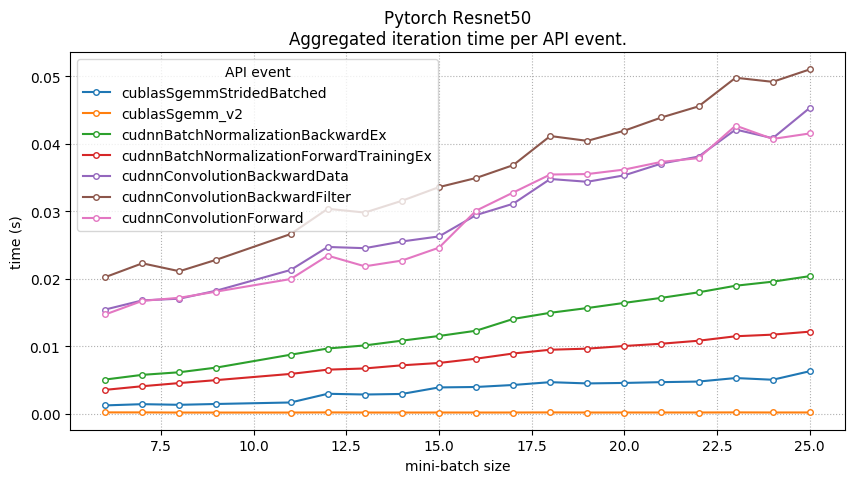

In [7]:
timesT = times.pivot_table(columns='API event', index='param', values='duration',aggfunc='sum')
# Use MBS 5-40
timesT = timesT.loc[:40]
display(timesT.tail())
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
timesT.plot(marker='o', ms=4, mfc='w', ax=ax)
ax.grid(ls=':', which='major')
ax.grid(ls=':', lw=0.5, which='minor')
ax.set_xlabel('mini-batch size')
ax.set_ylabel('time (s)')
plt.title('Pytorch Resnet50\nAggregated iteration time per API event.')
plt.show()

In [16]:
# Group API events by type
def getType(e):
    types = {'FC': 'sgemm_v2',
             'conv': 'conv',
             'BN': 'batchnormalization'}
    for k, v in types.items():
        m = re.search(v, e.lower())
        if m is not None:
            return k
    return 'other'

In [17]:
# Sum time for same type events
times['type'] = times['API event'].apply(getType)
times = times[(times['type'] != 'other') & (times['param'] != 50)]
times = times.groupby(['type', 'param'], as_index=False).sum()
times['param'] = times['param'].astype(int)
times.head()
times.sample(n=7)

,type,param,iteration,duration
6,BN,12,6,0.034357
12,FC,6,3,0.000419
30,conv,20,9,0.214981
9,BN,30,6,0.084773
21,FC,40,3,0.000663
17,FC,12,3,0.000453
20,FC,30,3,0.000463


In [18]:
timesT = times.pivot_table(columns='type', index='param', values='duration')
timesT.head()

type,BN,FC,conv
param,,,
5,0.017407,0.000460,0.084629
6,0.017144,0.000419,0.081668
7,0.019659,0.000418,0.091030
8,0.023046,0.000419,0.100493
9,0.025450,0.000424,0.110049


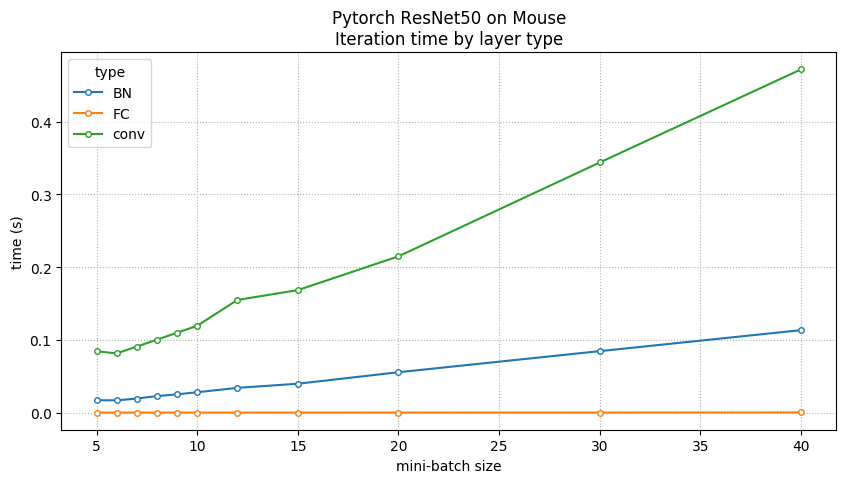

In [19]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
timesT.plot(marker='o', ms=4, mfc='w', ax=ax)
ax.grid(ls=':', which='major')
ax.grid(ls=':', lw=0.5, which='minor')
ax.set_xlabel('mini-batch size')
ax.set_ylabel('time (s)')
plt.title('Pytorch ResNet50 on Mouse\nIteration time by layer type')
plt.show()